In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Load CIFAR-10
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Normalisasi
x_train_full = x_train_full.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Split train jadi train + validation (4:1)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

print("Train:", x_train.shape)
print("Validation:", x_val.shape)
print("Test:", x_test.shape)

Train: (40000, 32, 32, 3)
Validation: (10000, 32, 32, 3)
Test: (10000, 32, 32, 3)


In [19]:
model1 = models.Sequential()
model1.add(layers.Conv2D(16, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))  # CIFAR-10 → 10 kelas

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [20]:
model2 = models.Sequential()
model2.add(layers.Conv2D(16, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(16, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))  # CIFAR-10 → 10 kelas

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [21]:
model3 = models.Sequential()
model3.add(layers.Conv2D(16, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(16, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(16, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))  # CIFAR-10 → 10 kelas
model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [22]:
def train_model(model):
    history = model.fit(
        x_train, y_train,
        epochs=20,
        validation_data=(x_val, y_val),
        batch_size=64,
        verbose = 1
    )
    return history

In [23]:
history1 = train_model(model1)
history2 = train_model(model2)
history3 = train_model(model3)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1482 - loss: 2.2022 - val_accuracy: 0.1996 - val_loss: 1.9251
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2324 - loss: 1.8709 - val_accuracy: 0.2773 - val_loss: 1.7812
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2972 - loss: 1.7708 - val_accuracy: 0.3180 - val_loss: 1.7277
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3301 - loss: 1.7045 - val_accuracy: 0.3847 - val_loss: 1.6200
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3980 - loss: 1.5884 - val_accuracy: 0.3975 - val_loss: 1.5996
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4158 - loss: 1.5476 - val_accuracy: 0.4176 - val_loss: 1.5444
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4246 - loss: 1.5171 - val_accuracy: 0.4152 - val_loss: 1.5343
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4371 - loss: 1.4840 - val_accuracy: 0.

In [24]:
# Prediksi test set
def predict_with(model):

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Flatten label test karena aslinya (10000,1)
    y_test_flat = y_test.flatten()

    # Hitung Macro F1
    macro_f1 = f1_score(y_test_flat, y_pred_classes, average='macro')
    print("Macro F1-Score on Test Set:", macro_f1)

In [25]:
predict_with(model1)
predict_with(model2)
predict_with(model3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Macro F1-Score on Test Set: 0.4702511451885433
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Macro F1-Score on Test Set: 0.6150259309252166
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Macro F1-Score on Test Set: 0.5805679943317058


In [26]:
import matplotlib.pyplot as plt

def plot_loss_histories(histories, labels):
    """Membuat grafik training dan validation loss dari beberapa riwayat pelatihan.

    Args:
        histories (list): Daftar objek History (hasil dari model.fit).
        labels (list): Daftar label yang sesuai untuk setiap riwayat.

    Returns:
        None (menampilkan grafik)
    """

    # Grafik Training Loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, grafik pertama
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=label)
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Grafik Validation Loss
    plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, grafik kedua
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_loss'], label=label)
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()  # Menyesuaikan tata letak agar tidak tumpang tindih
    plt.show()

# Contoh penggunaan:
# Asumsikan Anda memiliki beberapa model yang sudah dilatih dan
# disimpan dalam variabel history1, history2, dll.

# history1 = model1.fit(...)  # Contoh
# history2 = model2.fit(...)
# ...

# plot_loss_histories([history1, history2], ['Model 1', 'Model 2'])

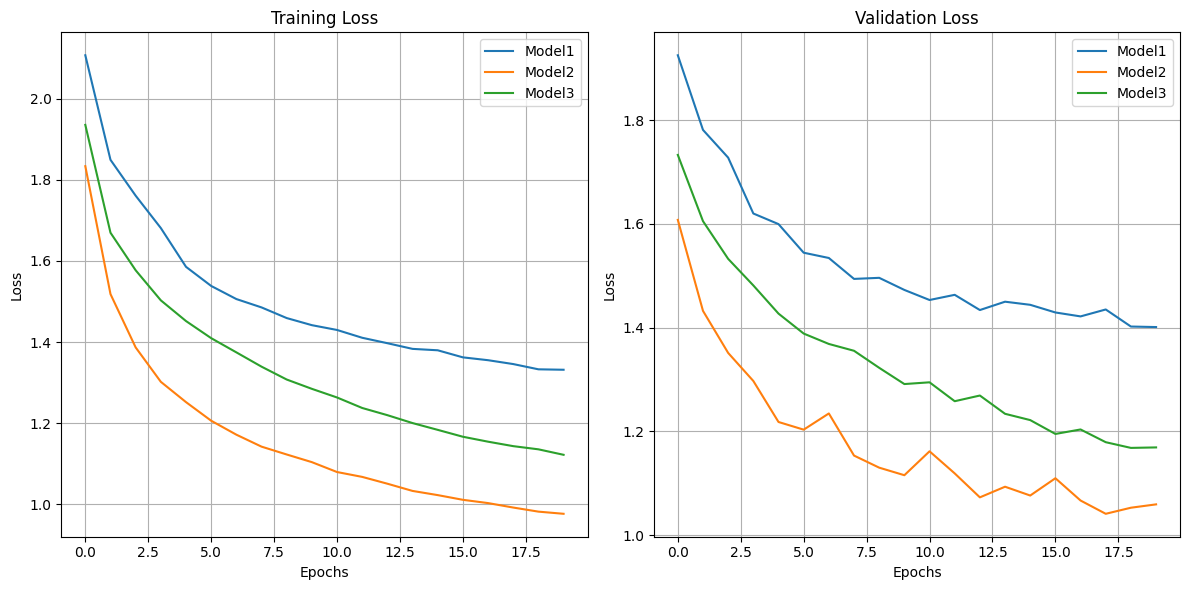

In [27]:
plot_loss_histories([history1,history2,history3],['Model1','Model2','Model3'])

In [28]:
model1.save('../models/test1_model_1.h5')
model2.save('../models/test1_model_2.h5')
model3.save('../models/test1_model_3.h5')

In [29]:
import sys
import os

dir_path = os.path.abspath(os.path.join(os.getcwd(), '..'))

if dir_path not in sys.path:
    sys.path.insert(0, dir_path)

try:
    from implementation import load
    from implementation import network
    print("Successfully imported 'load' and 'network' from the 'modules' package.")

except ImportError as e:
    print(f"Error importing modules: {e}")


Successfully imported 'load' and 'network' from the 'modules' package.


In [30]:

ScratchModel1 = load.load_scratch_model('../models/test1_model_1.h5')
ScratchModel2= load.load_scratch_model('../models/test1_model_2.h5')
ScratchModel3 = load.load_scratch_model('../models/test1_model_3.h5')


conv2d_6
creating new conv layer
max_pooling2d_3
creating new max pool layer
flatten_3
creating new flatten layer
dense_6
creating new dense layer
dense_7
creating new dense layer


conv2d_7
creating new conv layer
max_pooling2d_4
creating new max pool layer
conv2d_8
creating new conv layer
max_pooling2d_5
creating new max pool layer
flatten_4
creating new flatten layer
dense_8
creating new dense layer
dense_9
creating new dense layer


conv2d_9
creating new conv layer
max_pooling2d_6
creating new max pool layer
conv2d_10
creating new conv layer
max_pooling2d_7
creating new max pool layer
conv2d_11
creating new conv layer
max_pooling2d_8
creating new max pool layer
flatten_5
creating new flatten layer
dense_10
creating new dense layer
dense_11
creating new dense layer


In [31]:
def scratch_predict(model):
    preds = network.predict(model,x_test)
    preds_classes = np.argmax(preds, axis=1)

    # Flatten label test karena aslinya (10000,1)
    y_test_flat = y_test.flatten()

    # Hitung Macro F1
    scratch_macro_f1 = f1_score(y_test_flat, preds_classes, average='macro')
    # print("Macro F1-Score on Test Set:", scratch_macro_f1)
    return scratch_macro_f1

In [32]:
# accuracy1 = scratch_predict(ScratchModel1)
# accuracy2 = scratch_predict(ScratchModel2)
# accuracy3 = scratch_predict(ScratchModel3)


In [33]:
# print("Macro F1-Score on Test Set:", accuracy1)
# print("Macro F1-Score on Test Set:", accuracy2)
# print("Macro F1-Score on Test Set:", accuracy3)
